# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

**Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company, FoodHub, offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

**Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants, which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company, and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.




















### Data Dictionary
The data contains different data related to a food order. The detailed data dictionary is given below.

**Data Dictionary:**



*   order_id: Unique ID of the order
*   customer_id: ID of the customer who ordered the food
*   restaurant_name: Name of the restaurant
*   cuisine_type: Cuisine ordered by the customer
*   cost_of_the_order: Price paid per order

*  day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
*  rating: Rating given by the customer out of 5

*  food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
*  delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

### Let us start by importing the required libraries

In [138]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [139]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
# Write your code here to read the data
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project_FoodHub/foodhub_order.csv')
df=data.copy()

In [101]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [141]:
print(df.shape)
print(f"No of rows in dataset = {df.shape[0]}")
print(f"No of columns in dataset = {df.shape[1]}")

(1898, 9)
No of rows in dataset = 1898
No of columns in dataset = 9


#### **Observations:-**: There are 1898 rows and 9 columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [142]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### **Observations:-**: There are 3 datatypes in dataset those are float,int64 and object


*   cost_of_the_order is float64
*   food_preparation_time and delivery_time are in int64

*   rating is an object because of missing values or text values






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [143]:
#Let's check for null values in DataSet
print(df.isnull().sum())
print("-----------------------------------------------")
#checking the no of orders having rating as "Not given"
not_given_ratings = (df["rating"] == "Not given").sum()
print(f"For {not_given_ratings} orders out of {len(df)} orders rating is Not given")

#for now converting the rating column to numeric for further analysis replacing "Not given" rating with NaN
df["rating"] = pd.to_numeric(df["rating"],errors='coerce')
df.head(5)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
-----------------------------------------------
For 736 orders out of 1898 orders rating is Not given


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


#### **Observations:-**:

*   rating column has 736 entries labeled as "Not given", which should be treated as missing data.

*  Missing values are replaced with NaN for now instead of disturbing the entire dataset for EDA Purpose.







### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [144]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [145]:
#Minimum food preparation time
min_time = df['food_preparation_time'].min()
#Average food preparation time
avg_time = df['food_preparation_time'].mean()
#Maximum food preparation time
max_time = df['food_preparation_time'].max()

print(f"Minimum time: {min_time} Minutes")
print(f"Average time: {avg_time} Minutes")
print(f"Maximum time: {max_time} Minutes")


Minimum time: 20 Minutes
Average time: 27.371970495258168 Minutes
Maximum time: 35 Minutes


**Observations:** After revewing the statistical summary, below are the observations on food preparation time
Minimum time = 20.0 Minutes, Average time = 27.37 Minutes, Maximum time = 35.0 Minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [146]:
# Checing for orders which are not rated, as we already changed the Not given with Null, will filter ratings with having Null Values which will give orders count having no Rating.
df['rating'].isnull().sum()

736

#### **Observations**: Out of 1898 Orders, 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Univariate Analysis for Numerical Variables**

**Cost of the Order Visualization with Histplot & Boxplot**

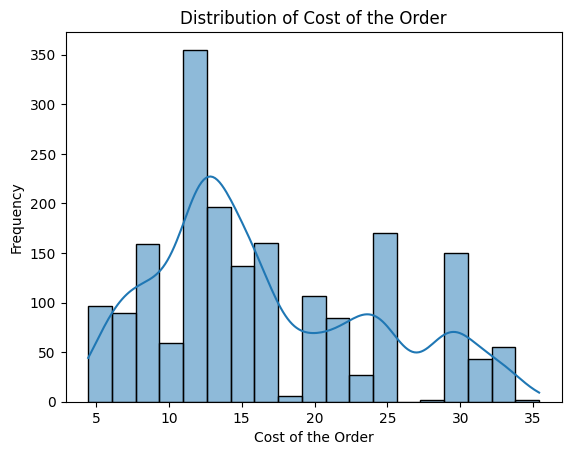

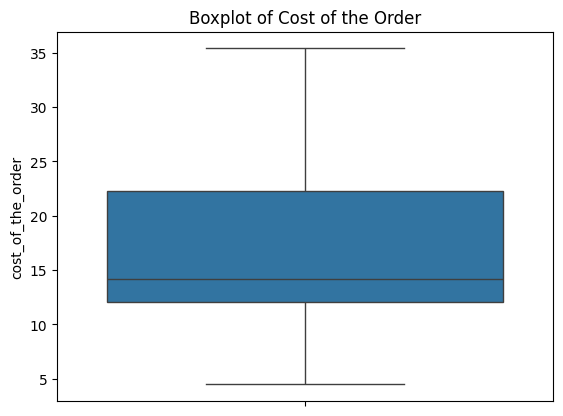

Mean:16.498851422550054
Median:14.14


In [147]:
#Histogram
sns.histplot(df['cost_of_the_order'],kde=True)
plt.title("Distribution of Cost of the Order")
plt.xlabel("Cost of the Order")
plt.ylabel("Frequency")
plt.show()

#Box Plot
sns.boxplot(df['cost_of_the_order'])
plt.title("Boxplot of Cost of the Order")
plt.show()

#Mean & Median Calculation
cost_mean=df['cost_of_the_order'].mean()
cost_med=df['cost_of_the_order'].median()
print(f"Mean:{cost_mean}")
print(f"Median:{cost_med}")


**Observations:-** :

Histogram:-
*   The distribution of cost_of_the_order is right skewed (Mean>Median)
*   Majority of orders having reasonable prices, and also high value orders also exists

Boxplot:-
*   Outliners are not present as seen in the box plot





**Food Preparation Time Visualization with Histplot and Box Plot**

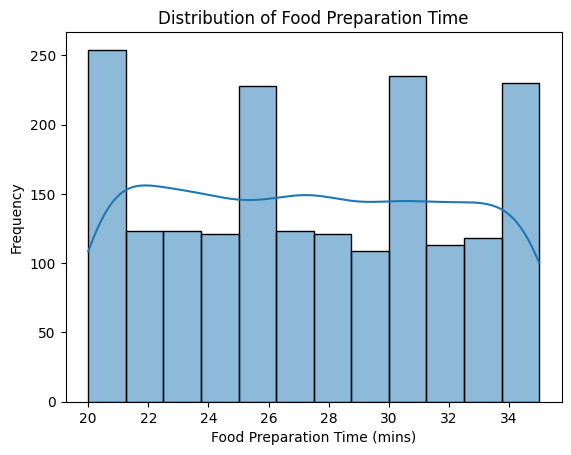

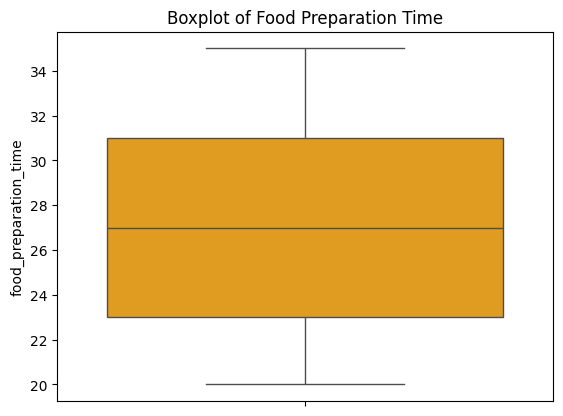

Mean:27.371970495258168
Median:27.0


In [148]:
#Histogram
sns.histplot(df['food_preparation_time'],kde=True)
plt.title("Distribution of Food Preparation Time")
plt.xlabel("Food Preparation Time (mins)")
plt.ylabel("Frequency")
plt.show()

#Box Plot
sns.boxplot(df['food_preparation_time'],color="orange")
plt.title("Boxplot of Food Preparation Time")
plt.show()

#Mean & Median Calculation
fp_mean=df['food_preparation_time'].mean()
fp_med=df['food_preparation_time'].median()
print(f"Mean:{fp_mean}")
print(f"Median:{fp_med}")

**Observations:-**:-

Histogram:-
*   The Food Preparation Time follows normal distribution (Mean Approx equal to Median)
*   Most food is prepared in a specific time range, likely around 20 minutes.

Boxplot:-
*   There are no outliners in Box Plot






**Delivery Time Visualization with Histogramm and Box Plot**

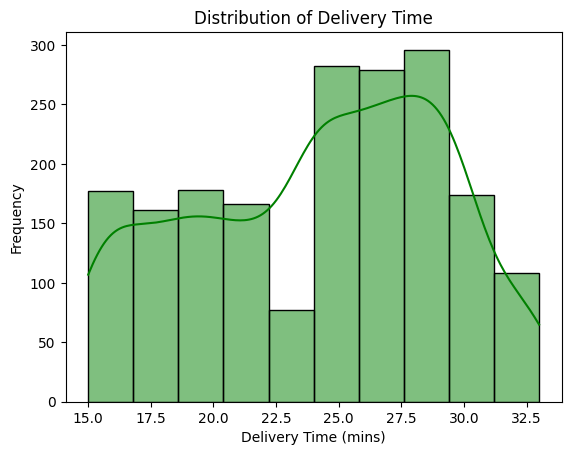

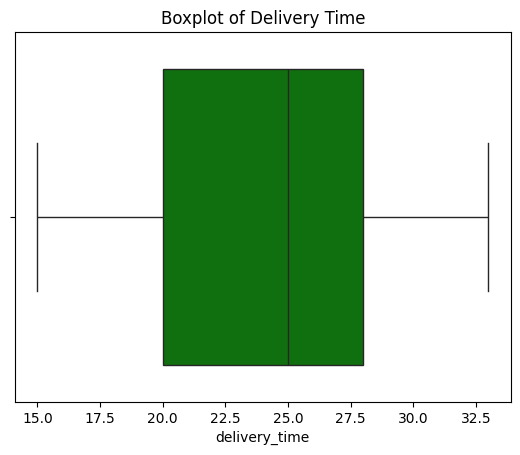

Mean:24.161749209694417
Median:25.0


In [149]:
#Histogram
sns.histplot(df["delivery_time"], bins=10, kde=True, color="green")
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (mins)")
plt.ylabel("Frequency")
plt.show()

#Boxplot
sns.boxplot(x=df["delivery_time"], color="green")
plt.title("Boxplot of Delivery Time")
plt.show()

#Mean & Median Calculation
del_mean=df['delivery_time'].mean()
dev_med=df['delivery_time'].median()
print(f"Mean:{del_mean}")
print(f"Median:{dev_med}")


**Observations:-**:-

Histogram:-
*   Delivery Time distribution is looking slightly Left Skewed (Mean < Median)
*   Most of the orders are delivered in range between 25-27 Minutes.

Boxplot:-
*   No Outliners in the box plot



**Rating for orders Visualization with Histogram and Box Plot**

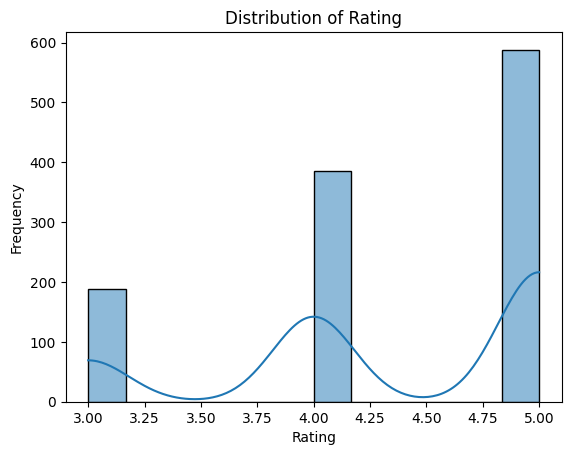

Mean:4.344234079173838
Median:5.0


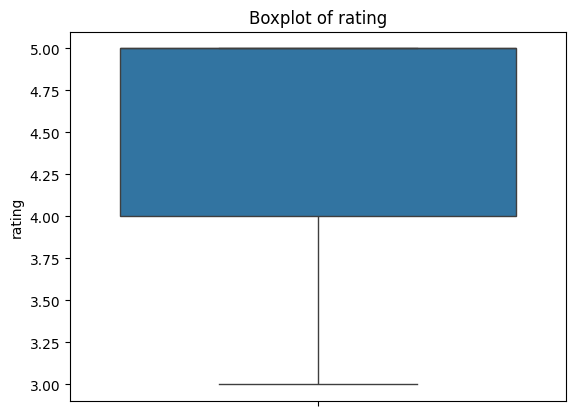

In [150]:
#Histogram
sns.histplot(df['rating'],kde=True)
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#Box Plot
plt.title("Boxplot of rating")
sns.boxplot(df['rating']);

#Mean & Median Calculation
rating_mean=df['rating'].mean()
rating_med=df['rating'].median()
print(f"Mean:{rating_mean}")
print(f"Median:{rating_med}")

**Observations:-**

Histogram:-
*   Most ratings are around 4 & 5
*   The distribution of ratings is skewed towards values 4,5 (Mean < Median)

Boxplot:-
*   No Significiant outliers are observed
*   The IQR lies in between 3 & 5








**Univariate Analysis for Categorical Variables**

**Cuisine Type Visualization in Count Plot**

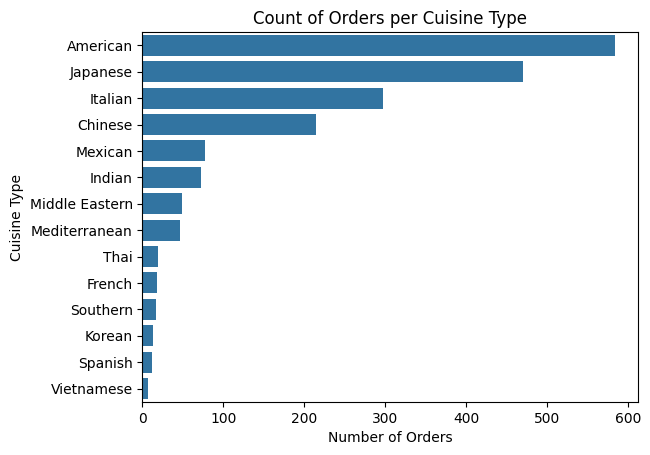

In [151]:
sns.countplot(order=df["cuisine_type"].value_counts().index, y=df["cuisine_type"])
plt.title("Count of Orders per Cuisine Type")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")
plt.show()

**Observations:**


*   Most orders are seeing in American Cuisine
*   American,Japanese,Italin cuisine are in top 3 which received more orders



**Day of the Week Visualization in Count Plot**

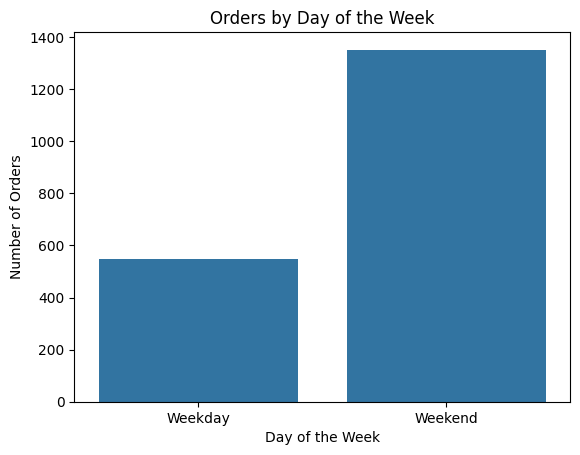

In [152]:
sns.countplot(x=df["day_of_the_week"], order=["Weekday", "Weekend"])
plt.title("Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()


**Observations:-**


*   Higher orders at weekend's than weekday's
*   People are preffering to order during weekends rather than weekday's



**Restaurant Name Bar Plot Visualization:-**

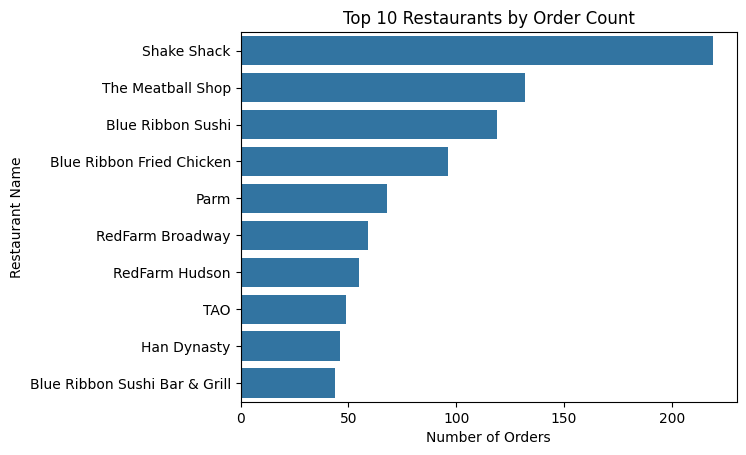

In [153]:
top_restaurants = df["restaurant_name"].value_counts().nlargest(10)
sns.barplot(y=top_restaurants.index, x=top_restaurants.values)
plt.title("Top 10 Restaurants by Order Count")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")
plt.show()

**Observations:-**


*   Shake shack restaurant received more orders and its compartively high than others
*   Shake Shack,The Meatball Shop and Blue Ribbon Sushi are the top 3 restaurants which received more orders
*   Seems Shake Shack restaurant is more popular





### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [154]:
# Write the code here
top_5_restaurants=df["restaurant_name"].value_counts().nlargest(5)
top_5_restaurants

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


**Observations:-**:-Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken and Parm are top 5 restaurants

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [155]:
# Write the code here
popular_cusiine_weekend=df[df["day_of_the_week"]=="Weekend"]['cuisine_type'].value_counts().idxmax()
popular_cusiine_weekend

'American'

#### **Observations:-**: American cuisine is popular one on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [156]:
# Write the code here
orders_greater_than_20 = (df['cost_of_the_order'] > 20).sum()
total_orders = len(df)
percentage_greater_than_20 = (orders_greater_than_20 / total_orders) * 100
print(f"Percentage of orders costing more than $20: {percentage_greater_than_20} %")

Percentage of orders costing more than $20: 29.24130663856691 %


#### **Observations:-**: 29.24% of orders costs more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [157]:
# Write the code here
mean_of_delivery_time=df['delivery_time'].mean()
print(f"Mean of order delivery time is {mean_of_delivery_time} Minutes")

Mean of order delivery time is 24.161749209694417 Minutes


#### **Observations:-**: The average delivery time is 24.16 Minutes for getting the order deleivered to customer


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [158]:
# Write the code here
top_3_customers=df['customer_id'].value_counts().nlargest(3)
top_3_customers

,count
customer_id,
52832,13
47440,10
83287,9


#### **Observations:-**: Below Customer_id's are 3 most frequent customers.

*   Customer ID - 52832, with 13 Orders
*   Customer ID - 47440, with 10 Orders
*   Customer ID - 83287, with 9 Orders







### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**1.Correlation Heatmap (Numerical Variables):**

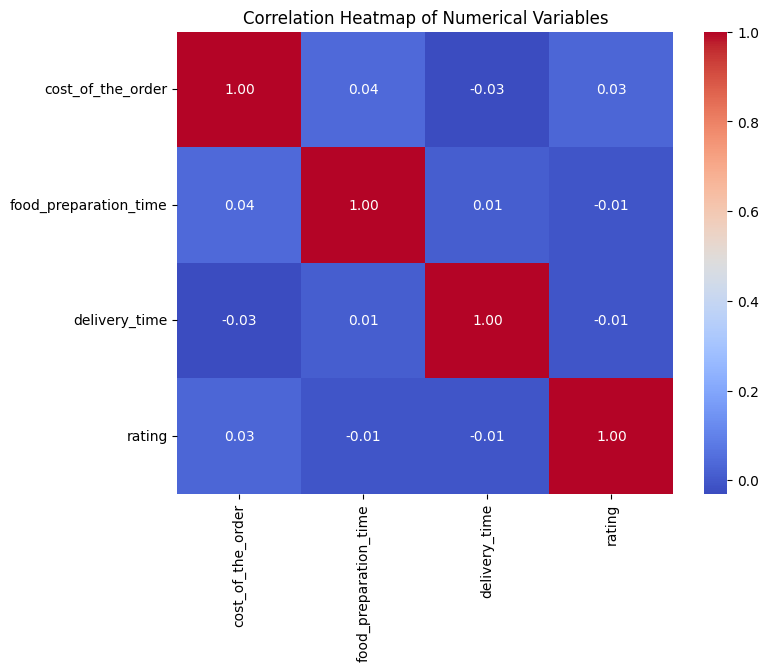

In [159]:
# Write the code here
plt.figure(figsize=(8, 6))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Observations:-**:


*  All correlation values are close to 0, meaning no strong linear relationships exist between the variables.

*  The cost of the order has weak correlations with food preparation time (0.04), delivery time (-0.03), and rating (0.03), indicating that higher order costs do not significantly affect preparation or delivery time.


*  A near-zero correlation (0.01) suggests that food preparation time does not influence delivery time.


* The rating has weak negative correlations with food preparation time (-0.01) and delivery time (-0.01), meaning these factors do not strongly impact customer ratings.








**2.Boxplot: Day of the Week vs. Delivery Time**

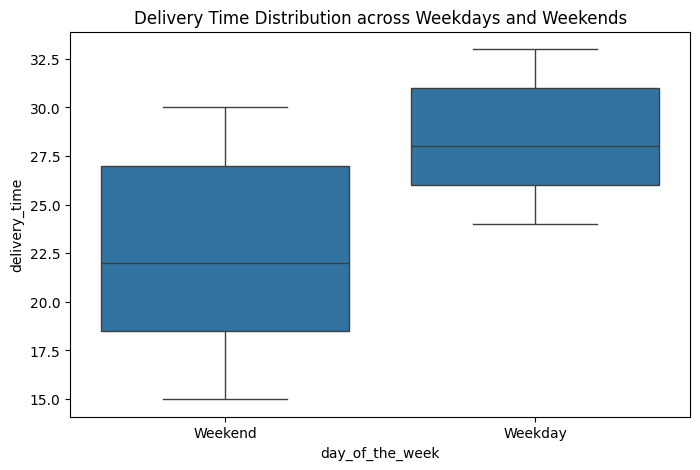

In [160]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time Distribution across Weekdays and Weekends')
plt.show()


**Observations:-**:-


*   Delivery times on weekdays tend to be slightly longer than on weekends.
*   Weekdays have a higher variance in delivery time



**3.Boxplot: Cuisine Type vs. Cost of Order**

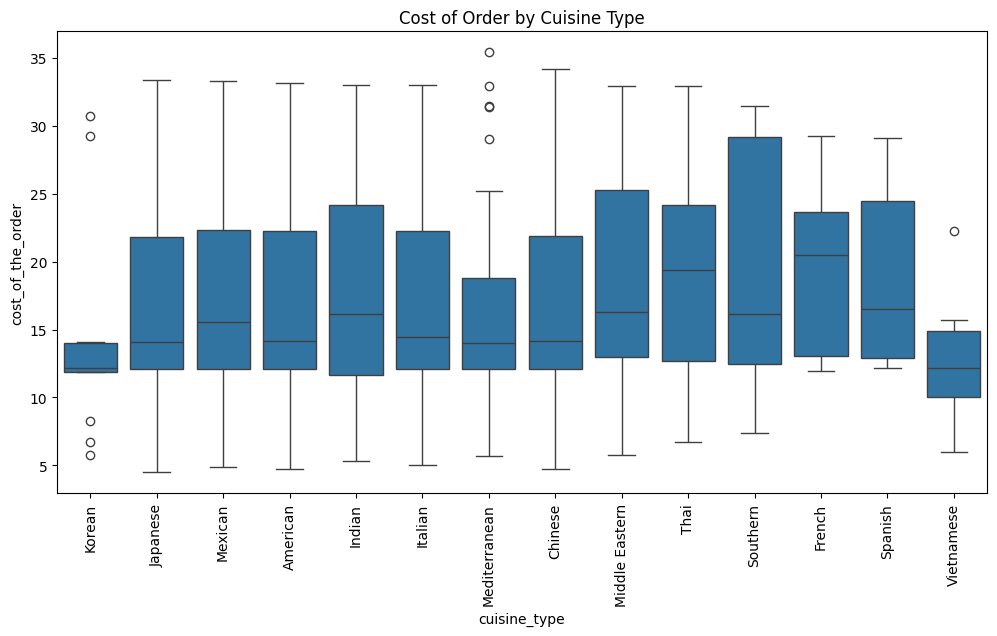

In [161]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.title('Cost of Order by Cuisine Type')
plt.show()

**Observations:-**:-

*   Korean and Vietnamese cuisines have lower median costs,their median cost is visibly lower than other cuisines.

*   Southern and Thai cuisines have the highest median order costs, They are among the most expensive cuisines.


*   Wide variability in order costs, Some cuisines (e.g., Indian, Japanese, and American) show a wide spread in costs, meaning orders range from cheap to expensive.

*   Korean,Vietnamese,Mediterianean have outliers





**4.Pairplot: Relationships Between Numerical Variables**

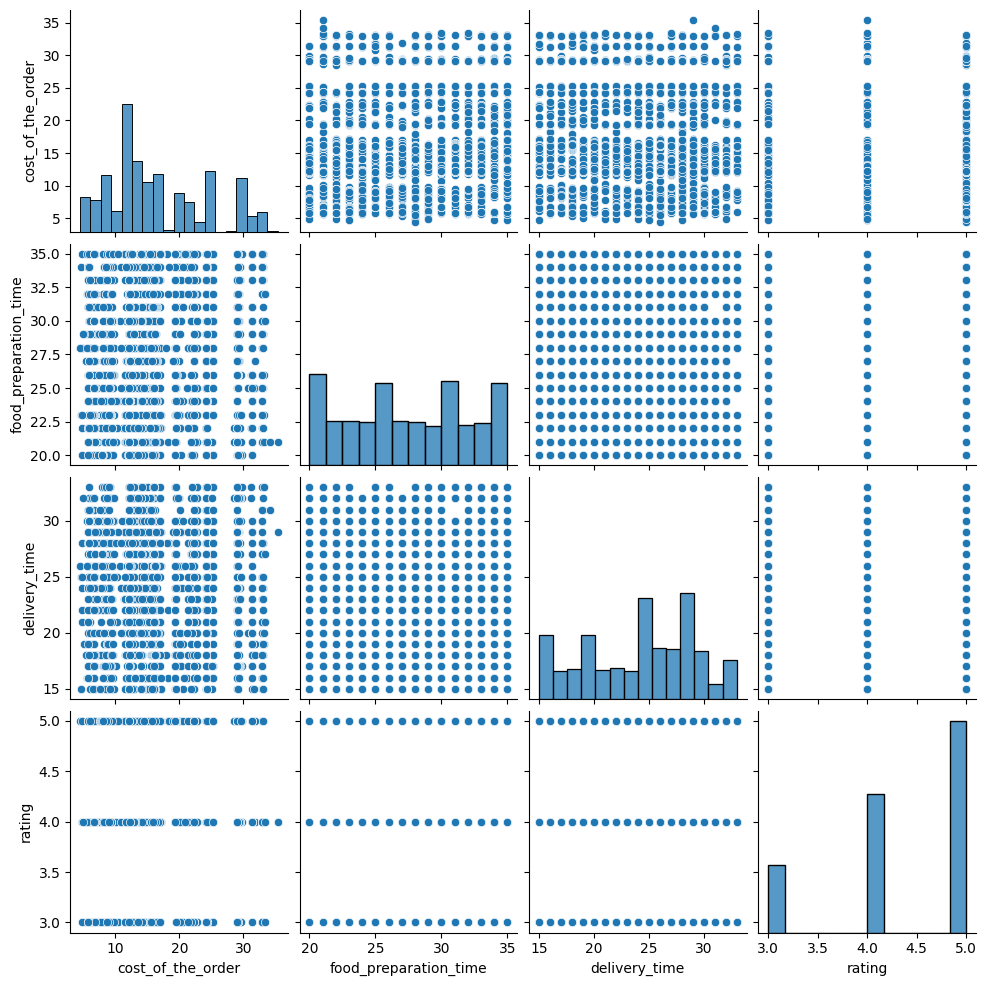

In [162]:
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']])
plt.show()

**Observations:-**:-


*   **Cost of the Order Distribution** – The histogram shows a right-skewed distribution, meaning most orders are on the lower cost side, but some high-cost orders exist.

*   **Food Preparation Time Distribution** – The histogram suggests a uniform or slightly multimodal distribution, indicating that preparation times vary widely without a clear single peak.


*   **Delivery Time Distribution** - The histogram is more spread out, showing that delivery times vary significantly.

*   **Rating Distribution -** The rating is heavily skewed towards 5, meaning most customers give high ratings, with fewer ratings at 3 or below.


*   **Scatter Plots Show No Strong Relationships** – There are no clear linear trends between variables, supporting the earlier heatmap’s observation that the numerical features have weak correlations.

* Delivery time and food preparation time appear to take on discrete values rather than continuous ones, leading to grid-like scatter plots.


* The ratings are mostly clustered around 4 and 5, showing little dependence on cost, preparation time, or delivery time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [163]:
# Write the code here
ratings_df = data[data['rating'] != 'Not given'].copy()
ratings_df['rating'] = ratings_df['rating'].astype(int)
restaurant_ratings_count=ratings_df.groupby("restaurant_name").agg(rating_count=("rating", "count"),average_rating=("rating", "mean")).reset_index()
eligible_restaurants = restaurant_ratings_count[(restaurant_ratings_count["rating_count"] > 50) & (restaurant_ratings_count["average_rating"] > 4)]
eligible_restaurants

,restaurant_name,rating_count,average_rating
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


#### **Observations:-**:

Below are the four restaurants fufilling the criteria to get the promotional offer
*   Blue Ribbon Fried Chicken
*   Blue Rubbon Sushi
*   Shake  Shack
*   The Meatball Shop









### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [164]:
# Function for calculating charges on each order
def calc_charges(cost_of_order):
  if cost_of_order>20:
    return cost_of_order*0.25
  elif cost_of_order>5:
    return cost_of_order*0.15
  else:
    return 0

calc_charges(7)

df['Cost_after_charges']=df['cost_of_the_order'].apply(calc_charges)
total_revenue_generated=df['Cost_after_charges'].sum()
print(f"Total Revenue Generated is {total_revenue_generated} $")


Total Revenue Generated is 6166.303 $


#### **Observations:-**:
The total revenue generated by the company after applying the charges on all orders is 6166.303 $

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [165]:
# Creating new column in df with total time took to deliver order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Cost_after_charges,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385,49


In [166]:
orders_took_morethan_60Min=(df['total_time']>60).sum()
percentage_of_orders_took_morethan_60Min=(orders_took_morethan_60Min/len(df))*100
print(f"Percentage of orders took more than 60 minutes is {percentage_of_orders_took_morethan_60Min}")

Percentage of orders took more than 60 minutes is 10.537407797681771


#### **Observations**: 10.53% of orders took more than 60 Minutes to deliver the food one food is ordered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [167]:
# Write the code here
weekday_mean = df[df["day_of_the_week"] == "Weekday"]["delivery_time"].mean()
weekend_mean = df[df["day_of_the_week"] == "Weekend"]["delivery_time"].mean()
print("Weekday Mean:", weekday_mean)
print("Weekend Mean:", weekend_mean)

Weekday Mean: 28.340036563071298
Weekend Mean: 22.4700222057735


#### **Observations:-**:

*   The Delivery time during weekday is more than weekend
*   Possible reasons are like higher traffic, more orders, or fewer delivery personnel available on weekdays.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions**:
*  Some cuisines tend to receive consistently higher ratings, highlighting the importance of food quality and customer preferences.

*   Around 39% of orders have no ratings, limiting insights into customer satisfaction and service improvements.
*   Faster deliveries do not significantly impact order cost, implying that restaurants with varying price points follow similar delivery patterns.


*   Higher-priced orders do not guarantee better ratings, suggesting that pricing alone does not drive customer satisfaction.





### **Recommendations**:

*  Support Low-Performing Cuisine Types, Improve food quality and consistency for underperforming cuisine types to boost ratings and customer retention

*   Highlight top-rated restaurants like having rating >4, and having 50+ reviews in advertisements to attract more customers.
*   Reduce delays and ensure consistency in delivery time, as unpredictable delays can impact customer satisfaction, especially on weekends.

*   Offer discounts or incentives for customers to leave ratings, ensuring more reliable feedback for business improvements.



